In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = "Zookeeper"
dir_path = "../data/"

In [3]:
# Cargar el dataset
logDF = pd.read_csv(f"{dir_path}{dataset}_2k.log_structured.csv")
categorias = {
    'ERROR': 'Error',
    'INFO': 'Informativo',
    'WARN': 'Advertencia'
}
logDF['Level'] = logDF['Level'].replace(categorias)

logDF.head(2)


,LineId,Date,Time,Level,Node,Component,Id,Content,EventId,EventTemplate
0,1,2015-07-29,"17:41:44,747",Informativo,QuorumPeer[myid=1]/0,0:0:0:0:0:0:0:2181:FastLeaderElection,774,Notification time out: 3200,E31,Notification time out: <*>
1,2,2015-07-29,"19:04:12,394",Informativo,/10.10.34.11,3888:QuorumCnxManager$Listener,493,Received connection request /10.10.34.11:45307,E40,Received connection request /<*>:<*>


In [4]:
# Corregir el formato de 'Time'
logDF['Time'] = logDF['Time'].str.replace(',', '.', regex=False)

# Crear nueva columna 'datetime'
logDF['datetime'] = pd.to_datetime(logDF['Date'] + ' ' + logDF['Time'], errors='coerce')
# Formatear al formato 'YYYY-MM-DD HH:MM:SS.mmm'
logDF['datetime'] = logDF['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]

logDF.head()

,LineId,Date,Time,Level,Node,Component,Id,Content,EventId,EventTemplate,datetime
0,1,2015-07-29,17:41:44.747,Informativo,QuorumPeer[myid=1]/0,0:0:0:0:0:0:0:2181:FastLeaderElection,774,Notification time out: 3200,E31,Notification time out: <*>,2015-07-29 17:41:44.747
1,2,2015-07-29,19:04:12.394,Informativo,/10.10.34.11,3888:QuorumCnxManager$Listener,493,Received connection request /10.10.34.11:45307,E40,Received connection request /<*>:<*>,2015-07-29 19:04:12.394
2,3,2015-07-29,19:04:29.071,Advertencia,SendWorker,188978561024:QuorumCnxManager$SendWorker,688,Send worker leaving thread,E42,Send worker leaving thread,2015-07-29 19:04:29.071
3,4,2015-07-29,19:04:29.079,Advertencia,SendWorker,188978561024:QuorumCnxManager$SendWorker,679,Interrupted while waiting for message on queue,E24,Interrupted while waiting for message on queue,2015-07-29 19:04:29.079
4,5,2015-07-29,19:13:17.524,Advertencia,SendWorker,188978561024:QuorumCnxManager$SendWorker,688,Send worker leaving thread,E42,Send worker leaving thread,2015-07-29 19:13:17.524


In [5]:
# Longitud de cada mensaje (# palabras)
logDF['content_length'] = logDF['Content'].astype(str).apply(lambda x: len(x.split()))


In [6]:
# Estadísticas
print("Total de registros:", len(logDF))
print("Rango temporal:", logDF['datetime'].min(), "→", logDF['datetime'].max())
print("Distribución por nivel:", logDF['Level'].value_counts())
print("Longitud de mensaje (palabras) con promedio:", logDF['content_length'].mean())
print("Longitud de mensaje (palabras) con mediana:", logDF['content_length'].median())

Total de registros: 2000
Rango temporal: 2015-07-29 17:41:44.747 → 2015-08-25 11:26:28.145
Distribución por nivel: Level
Advertencia    1318
Informativo     669
Error            13
Name: count, dtype: int64
Longitud de mensaje (palabras) con promedio: 6.2955
Longitud de mensaje (palabras) con mediana: 5.0


C:\Users\KARINA\AppData\Local\Temp\ipykernel_22372\3905531008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")


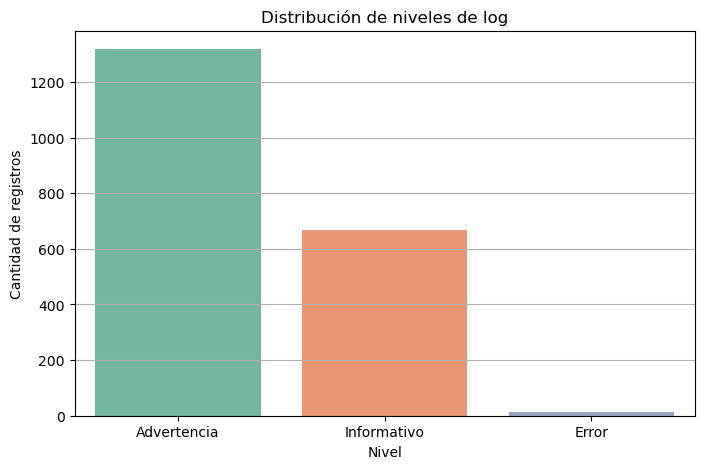

In [7]:
# Distribución por nivel
plt.figure(figsize=(8,5))
sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")
plt.title("Distribución de niveles de log")
plt.xlabel("Nivel")
plt.ylabel("Cantidad de registros")
plt.grid(axis='y')
plt.show()

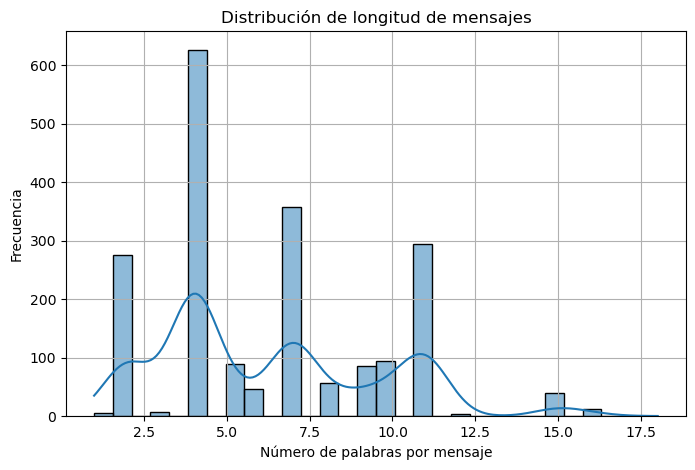

In [8]:
# Longitud de mensajes
plt.figure(figsize=(8,5))
sns.histplot(logDF['content_length'], bins=30, kde=True)
plt.title("Distribución de longitud de mensajes")
plt.xlabel("Número de palabras por mensaje")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

In [9]:
logDF.to_csv(f"{dir_path}{dataset}_2k.log_structured_to_process.csv", index=False)